<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [58]:
# Читаем данные с помощью библиотеки Pandos
hh_database = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep= ';')
# Смотрим размерность таблицы
hh_database.shape

(44744, 12)

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [59]:
print(hh_database.head())
print(hh_database.tail())

                                   Пол, возраст           ЗП  \
0    Мужчина ,  39 лет , родился 27 ноября 1979   29000 руб.   
1     Мужчина ,  60 лет , родился 20 марта 1959   40000 руб.   
2  Женщина ,  36 лет , родилась 12 августа 1982   20000 руб.   
3      Мужчина ,  38 лет , родился 25 июня 1980  100000 руб.   
4     Женщина ,  26 лет , родилась 3 марта 1993  140000 руб.   

                           Ищет работу на должность:  \
0                            Системный администратор   
1                               Технический писатель   
2                                           Оператор   
3  Веб-разработчик (HTML / CSS / JS / PHP / базы ...   
4                  Региональный менеджер по продажам   

                        Город, переезд, командировки  \
0  Советск (Калининградская область) , не готов к...   
1  Королев , не готов к переезду , готов к редким...   
2  Тверь , не готова к переезду , не готова к ком...   
3  Саратов , не готов к переезду , готов к редким...  

3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [60]:
hh_database.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

4. Обратите внимание на информацию о числе непустых значений.

In [61]:
hh_database.count()

Пол, возраст                       44744
ЗП                                 44744
Ищет работу на должность:          44744
Город, переезд, командировки       44744
Занятость                          44744
График                             44744
Опыт работы                        44576
Последнее/нынешнее место работы    44743
Последняя/нынешняя должность       44742
Образование и ВУЗ                  44744
Обновление резюме                  44744
Авто                               44744
dtype: int64

5. Выведите основную статистическую информацию о столбцах.


In [62]:
hh_database.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [63]:
# На вход данной функции поступает строка с образованием.
def level_education(educat):
    # Метод split() разбивает строку на слова по пробелу.
    # В результате получаем список слов в строке и заносим его в переменную educat_list.
    educat_list = educat.split(' ')
    # Обрезаем список, оставляя в нём только первые два  элемента и преобразуем его в строку ,
    educat_type = ' '.join(educat_list[0:2])
    # Делаем проверку на уровень образования.
    if 'Высшее' in educat_type :
        educat_type = 'высшее'
    elif 'Неоконченное высшее' in educat_type:
        educat_type = 'неоконченное высшее' 
    elif 'Среднее специальное' in educat_type:
        educat_type = 'среднее специальное'  
    elif 'Среднее' in educat_type:
        educat_type = 'среднее'      
    #Возвращаем переменную street_type, в которой хранится уровень образования.
    return educat_type

#создаем новый признак Образование методом apply
hh_database['Образование'] = hh_database['Образование и ВУЗ'].apply(level_education)


print(hh_database['Образование'].value_counts())

# удоляем столбец Образование и ВУЗ
hh_database = hh_database.drop('Образование и ВУЗ', axis=1)

высшее                 33863
среднее специальное     5765
неоконченное высшее     4557
среднее                  559
Name: Образование, dtype: int64


2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [64]:
# создаем новый столбец "Пол" по средствам метода apply 
hh_database['Пол'] = hh_database['Пол, возраст'].apply(lambda x: 'М' if x.split(',')[0].strip() == 'Мужчина' else 'Ж')

# создаем новый столбец "Возраст" по средствам метода apply 
hh_database['Возраст'] = hh_database['Пол, возраст'].apply(lambda x: int(x.split(',')[1].strip().split(' ')[0]) )

# Удоляем столбец "Пол, возраст"
hh_database = hh_database.drop('Пол, возраст', axis=1)

print((hh_database['Пол'].value_counts(normalize=True)*100).round(2))
print(f'Средний возраст = {hh_database["Возраст"].mean().round(1)}')

М    80.93
Ж    19.07
Name: Пол, dtype: float64
Средний возраст = 32.2


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [65]:
# На вход данной функции поступает строка Опыт работы 
def trans_month(arg):
    # обнуляем переменную х
    x = 0 
    # функция str() преобразует данные в строку
    # Метод split() разбивает строку на слова по пробелу.
    # В результате получаем список слов в строке и заносим его в переменную arg_list.
    arg_list = str(arg).split(' ')
    # ишем скрытые пропуски по строке "Не указано"
    if 'Не указано' in ' '.join(arg_list[0:2]) :
       return    
    #  Создаем списки названий месяцев и лет  
    monte1 = ['месяца', 'месяцев', 'месяц']
    year1 = ['лет', 'год', 'года']
    # проверяем вхождение количества лет и месяцев в списке и вычисляем количество меяцев
    if arg_list[3] in year1 :
        x = float(arg_list[2]) * 12
        if arg_list[5] in monte1:
            x += float(arg_list[4]) 
    elif arg_list[3] in monte1:        
        x = float(arg_list[2])  
    return x
   
# создаем маску по пропущеным данным      
mask1 =  hh_database['Опыт работы'].isnull()==False 

# создаем новый столбец опыт работы (месяц) по средствам метода apply и функции trans_month
hh_database['Опыт работы(месяц)'] = hh_database[mask1]['Опыт работы'].apply(trans_month)

# удоляем столбец Опыт работы
hh_database = hh_database.drop('Опыт работы', axis=1)


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [66]:
# На вход данной функции поступает строка 'Город, переезд, командировки' 
def sity_r(arg) :
    # создаем список города миллионники
    million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
     # Метод split() разбивает строку на слова по пробелу.
    # В результате получаем список слов в строке и заносим его в переменную arg_list.
    arg_list = arg.split(' ')
   # обнуляем строку sity
    sity = ()
    # определяем какому городу относится строка и определяем в переменную sity
    if arg_list[0] == 'Москва':
        sity = 'Москва'
    elif arg_list[0] == 'Санкт-Петербург':
        sity = 'Санкт-Петербург'
    elif arg_list[0] in million_cities:
        sity = 'город-миллионник'  
    else : sity = 'другие'
    return sity    
    
# создаем новый столбец 'Город' по средствам метода apply и функции sity_r        
hh_database['Город'] = hh_database['Город, переезд, командировки'].apply(sity_r)

# создаем новый столбец 'Готовность к переезду' по средствам метода apply  
hh_database['Готовность к переезду'] = hh_database['Город, переезд, командировки'].apply(lambda x: True if ('не готов к переезду' not in x) & ('не готова к переезду' not in x) | ('хочу' in x) else False)

# создаем новый столбец 'Готовность к командировкам' по средствам метода apply    
hh_database['Готовность к командировкам'] = hh_database['Город, переезд, командировки'].apply(lambda x: True if ('не готов к командировкам' not in x) & ('не готова к командировкам' not in x) & ('командировкам' in x) else False )

# Удоляем столбец 'Город, переезд, командировки'
hh_database = hh_database.drop('Город, переезд, командировки', axis=1)

print((hh_database['Город'].value_counts(normalize= True)*100).round())
print(f"отношение готовых к переезду и командировкам к готовности к командировкам {(hh_database[(hh_database['Готовность к переезду'] == True) & (hh_database['Готовность к командировкам'] == True)].shape[0] / hh_database['Готовность к командировкам'].count() * 100).round()} %" )

Москва              37.0
другие              37.0
город-миллионник    15.0
Санкт-Петербург     11.0
Name: Город, dtype: float64
отношение готовых к переезду и командировкам к готовности к командировкам 32.0 %


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [67]:
# методом apply создадим столбцы (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) 
# и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод)
hh_database['полная занятость'] = hh_database['Занятость'].apply(lambda x: True if 'полная занятость' in x else False)
hh_database['частичная занятость'] = hh_database['Занятость'].apply(lambda x: True if 'частичная занятость' in x else False)
hh_database['проектная работа'] = hh_database['Занятость'].apply(lambda x: True if 'проектная работа' in x else False)
hh_database['стажировка'] = hh_database['Занятость'].apply(lambda x: True if 'стажировка' in x else False)
hh_database['волонтерство'] = hh_database['Занятость'].apply(lambda x: True if 'волонтерство' in x else False)
hh_database['гибкий график'] = hh_database['График'].apply(lambda x: True if 'гибкий график' in x else False)
hh_database['полный день'] = hh_database['График'].apply(lambda x: True if 'полный день' in x else False)
hh_database['сменный график'] = hh_database['График'].apply(lambda x: True if 'сменный график' in x else False)
hh_database['вахтовый метод'] = hh_database['График'].apply(lambda x: True if 'вахтовый метод' in x else False)
hh_database['удаленная работа'] = hh_database['График'].apply(lambda x: True if 'удаленная работа' in x else False)

print(f"Количество человек желаюших заниматся проектной работай и волонтерством = {hh_database[(hh_database['проектная работа'] == True) & (hh_database['волонтерство'] == True)].shape[0]}")
print(f"Количество человек желаюших работать вахтовым методом с гибким графиком = {hh_database[ (hh_database['вахтовый метод'] == True) & (hh_database['гибкий график'] == True)].shape[0]}")

# удалим столбцы 'Занятость' и 'График'
hh_database = hh_database.drop(['Занятость','График'], axis=1)

Количество человек желаюших заниматся проектной работай и волонтерством = 436
Количество человек желаюших работать вахтовым методом с гибким графиком = 2311


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [68]:
# Читаем данные курсов валют с помощью библиотеки Pandos
Ex_Rates = pd.read_csv('data/ExchangeRates.csv', sep= ',')

# Удоляем ненужные столбцы 'per', 'time', 'vol'
Ex_Rates = Ex_Rates.drop(['per', 'time', 'vol'], axis=1)

# Обрезаем дату в 'Обновление резюме'  из hh_database до гггг-мм-дд и переводим в формат даты
hh_database['Обновление резюме'] = pd.to_datetime(hh_database['Обновление резюме'], dayfirst=False).dt.date
hh_database['Обновление резюме'] = pd.to_datetime(hh_database['Обновление резюме'], dayfirst=False)

#  переводим в формат даты стобец 'date' из Ex_Rates
Ex_Rates['date'] = pd.to_datetime(Ex_Rates['date'], dayfirst=True)
# выделяем из столбца 'ЗП' сумму и валюту желаемой зароботной платы
hh_database['сумма'] = hh_database['ЗП'].apply(lambda x: x.split(' ')[0])
hh_database['валюта'] = hh_database['ЗП'].apply(lambda x: x.split(' ')[1])

# на вход этой функции  поступает строка 'валюта'
# эта функция переводит название валюты в международный формат 
def convert(arg):
    if arg == 'грн.' :
        curr = 'UAH'
    elif arg == 'бел.руб.' :
        curr = 'BYN'
    elif arg == 'сум' :
        curr = 'UZS'   
    else :
        curr = arg
    return curr

# при помощи apply преобразуем солбец валюта в международней формат
hh_database['валюта'] = hh_database['валюта'].apply(convert)
  
#   Обединяем две таблицы методом merge по двем столбцам валюта и дата
hh_database = hh_database.merge(
    Ex_Rates,
    left_on= ['валюта','Обновление резюме'],
    right_on= ['currency','date'],
    how='left',
    )

# Заполняем пропущеные данные еденицами
hh_database = hh_database.fillna(value={'close' : '1', 'proportion' : '1'})

# создаем столбец 'ЗП (руб)' с помошью apply перемножая сумму и курс деленный на пропорцию
hh_database['ЗП (руб)'] = hh_database.apply(lambda x: float(x['сумма']) * float(x['close']) / float(x['proportion']), axis=1)

print(f"желаемая медианная заработная плата соискателей = {hh_database['ЗП (руб)'].median()}")

# удоляем столбцы 'ЗП', 'сумма', 'валюта', 'proportion', 'close', 'date','currency'
hh_database = hh_database.drop(['ЗП', 'сумма', 'валюта','currency',
                                 'proportion', 'close', 'date'], axis=1)

# Удоляем таблицу курсов
del(Ex_Rates)

# Выводим информацию таблицы hh_database
hh_database.info()

желаемая медианная заработная плата соискателей = 59000.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 44744 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Ищет работу на должность:        44744 non-null  object        
 1   Последнее/нынешнее место работы  44743 non-null  object        
 2   Последняя/нынешняя должность     44742 non-null  object        
 3   Обновление резюме                44744 non-null  datetime64[ns]
 4   Авто                             44744 non-null  object        
 5   Образование                      44744 non-null  object        
 6   Пол                              44744 non-null  object        
 7   Возраст                          44744 non-null  int64         
 8   Опыт работы(месяц)               44574 non-null  float64       
 9   Город                            44744 non-null  object        
 10  

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [69]:
# Строим гистограмму и коробчатую диаграмму
fig = px.histogram(hh_database, x="Возраст",
                   marginal="box",
                   hover_data=hh_database.columns,
                   title='распределение по признаку "Возраст"'
                   )
#fig.show()

# сохроняем график в html фаил
fig.write_html("F:\Курс DSPR-131\IDE\PROJECT-1. Анализ резюме из HeadHunter\html1/histogram_box1.html")

print(f'мода  признака Возраст = {hh_database["Возраст"].mode()[0]}')
print(f'максимальный Возраст = {hh_database["Возраст"].max()}')
print(f'минимальный Возраст = {hh_database["Возраст"].min()}')

мода  признака Возраст = 30
максимальный Возраст = 100
минимальный Возраст = 14


<center> <img src = https://drive.google.com/file/d/1p68s3yUpfnSnheVBRYwDfh7W6nLQFsv1/view?usp\drive_link alt="drawing" style="width:400px;">

Из графиков видно:
1. мода признака Возраст = 30 годам
2. 50 % соискателей это люди возрастом от 27 до 36 лет, остальные распределились от 14 лет до 27 и от 36 до 49 по 25 %  соответственно 
3. минимальное значение возраста 14 лет максимальное значение 100 лет
4. соискателей свыше 49 лет не много и это потонциальные выбросы. 
5. Самый большой возраст это 100 лет что скорее всего это выброс, да и люди возрастом выше 65 уже пенсионеры.

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [41]:
# Строим гистограмму и коробчатую диаграмму
fig = px.histogram(hh_database, x="Опыт работы(месяц)",
                   marginal="box",
                   hover_data=hh_database.columns,
                   title='распределение по признаку "Опыт работы (месяц)"'
                   )
#fig.show()

# сохроняем график в html фаил
fig.write_html("F:\Курс DSPR-131\IDE\PROJECT-1. Анализ резюме из HeadHunter\html1/histogram_box2.html")

print(f'мода  признака Опыт работы(месяц) = {hh_database["Опыт работы(месяц)"].mode()[0]}')
print(f'максимальный опыт работы (в месяцах) = {hh_database["Опыт работы(месяц)"].max()}')

мода  признака Опыт работы(месяц) = 81.0
максимальный опыт работы (в месяцах) = 1188.0


Из графиков видно :
1. Мода опыта работы равна 81 месяц
2. Опыт работы у соискателей начинается от одного месяца и заканчивается 1188 месяцев
3. У большенства соискателей опыт работы находится в интервале от 1 до 299 месяцев
4. Выроженной анамалией явлдяется опыт работы 1188 месяцев (99)лет хотя возраст его 48 лет что не может быть

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


In [42]:
# Строим гистограмму и коробчатую диаграмму
fig = px.histogram(hh_database, x="ЗП (руб)",
                   marginal="box",
                   hover_data=hh_database.columns,
                   title='распределение по признаку "ЗП (руб)"'
                   )
#fig.show()

# сохроняем график в html фаил
fig.write_html("F:\Курс DSPR-131\IDE\PROJECT-1. Анализ резюме из HeadHunter\html1/histogram_box3.html")

print(f'мода признака ЗП (руб) = {hh_database["ЗП (руб)"].mode()[0]}')



мода признака ЗП (руб) = 50000.0


Из графика видно:
1. Мода признака ЗП(руб) равна 50 тыс руб
2. Минимальная значение ЗП равна 1 рубль а максимальное значение 24304876 руб
3. У большенства соискателей желаемая ЗП находится в интервале от 1 рубля до 181 тысячи руб
4. ЗП свыше 1 милиона руб скарей всего являются анамалиями

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

Text(0.5, 1.0, 'Зависимость желаемой заработной платы  от уровня образования')

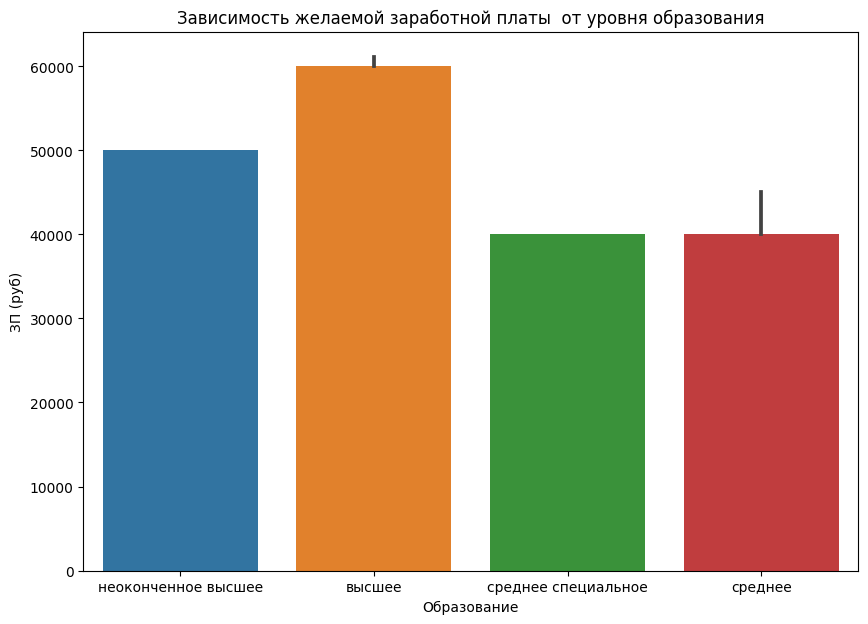

In [43]:
mask1 = hh_database['ЗП (руб)'] < 1000000 # Создаем маску

# Строим   диаграмму
fig = plt.figure(figsize=(10, 7))
barplot = sns.barplot(
    data=hh_database[mask1],
    x='Образование',
    y='ЗП (руб)',
    estimator= 'median'
)
barplot.set_title('Зависимость желаемой заработной платы  от уровня образования')


Из графика видно:
1. Наибольший уровнь желаемой заработной платы у соискателей с вышим образованием
2. Наименьший уровнь желаемой заработной платы у соискателей со средним и средне специальным образованием
3. Признак уровня образования важен так как соискатели с разным уровнем образования имеют разные уровни желаемой ЗП

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

In [44]:
# строим коробчатую диаграмму
fig = px.box(data_frame=hh_database[mask1], 
            x='ЗП (руб)', 
            color='Город',  
            height=300, 
            width=1200,
            title='распределение желаемой заработной платы в зависимости от города ' )
#fig.show()

# сохроняем график в html фаил
fig.write_html("F:\Курс DSPR-131\IDE\PROJECT-1. Анализ резюме из HeadHunter\html1/box1.html")

из графиков видно:
1. В Москве желаемая З.П. выше и ноходится от 60 до 150 тыс руб а медианная З.П. 85 тыс руб
2. Минимальные требования желаемой З.П. в городах миллионниках и других городах от 30 до 60 тыс руб медианная З.П. 40 тыс руб
3. признак города важен в прогназировании З.П.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

Text(0.5, 1.0, 'диаграмма которая показывает зависимость медианной заработной платы \n от признаков Готовность к переезду и Готовность к командировкам')

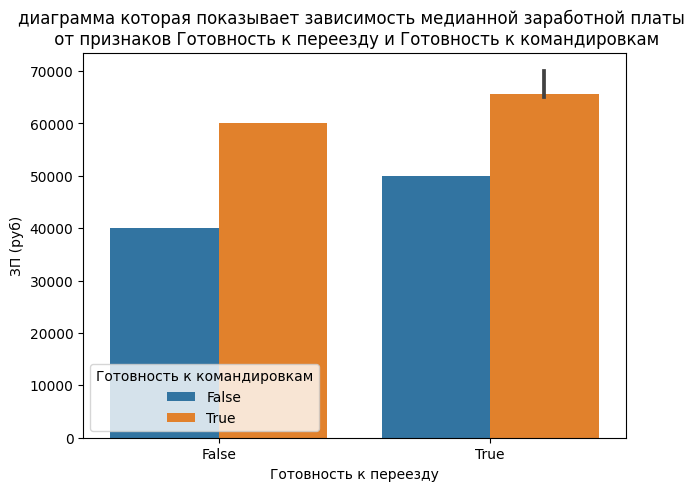

In [45]:
# строим диаграмму
fig = plt.figure(figsize=(7, 5))
barplot = sns.barplot(
    data=hh_database[mask1],
    x='Готовность к переезду',
    y='ЗП (руб)',
    hue='Готовность к командировкам',
    estimator='median'
)
barplot.set_title('диаграмма которая показывает зависимость медианной заработной платы \n от признаков Готовность к переезду и Готовность к командировкам')

1. медианная желаемая заработная плата выше у готовых к переезду и к командировкам 
2. медианная желаемая заработная плата выше у готовых к командировкам но не готовых переезжать к готовым переехать но неготовых к командировкам

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

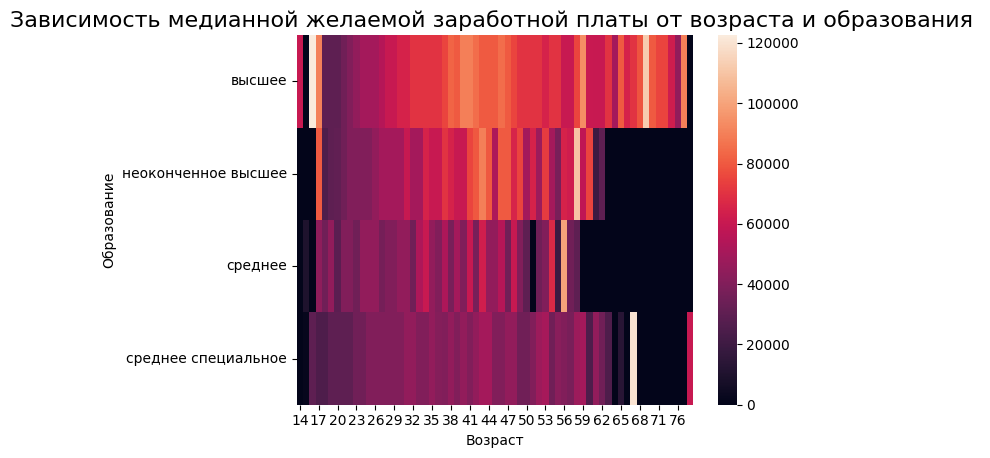

In [46]:
# Преобразуем данные столбца "Возраст" в тип int
hh_database['Возраст'].astype('int')

# Строим сводную таблицу
hh_date = hh_database.pivot_table(values='ЗП (руб)',
                        index='Образование',
                        columns='Возраст',
                        aggfunc='median',
                        fill_value=0)

# по данным таблицы строим тепловую карту 
heatmap = sns.heatmap(data=hh_date)
heatmap.set_title('Зависимость медианной желаемой заработной платы от возраста и образования ', fontsize=16)

# Удоляем сводную таблицу
del(hh_date)


1. максимальная медианная желаемая заработная плата у людей от 35 до 47 лет с высшем образованнием свыше 100 000 руб
2. у людей с неоконченым высшем образованием медианная желаемая  заработная плата в раёне от 60 000 до 100 000 руб
3. у людей со средним и средне специальным образованием медианная  желаемая заработная плата до 60 000 руб
4. у людей возростом от 35 до 50 лет повышеные требования к зароботной плате 

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

In [47]:
# Импортируем библиотеку graph_objects
import plotly.graph_objects as go

# Переводим опыт работы (месяц) в опыт работы (год)
hh_database['Опыт работы (год)']= hh_database['Опыт работы(месяц)'].apply(lambda x: x/12)

# Строим диаграмму рассеяния
fig = go.Figure()
fig = px.scatter(
    hh_database , 
    x='Возраст',
    y='Опыт работы (год)',
    width=1200,
    height=700,
    title='Диаграмма показывающаяю зависимость опыта работы от возраста '
)

# Задаем линию с координатами (0,0)(100,100)
df = pd.DataFrame(dict(
    x = [0, 100],
    y = [0, 100]
))
x=df['x']
y=df['y']

# Строим линию
fig.add_trace(go.Scatter(x=x, y=y,  name="Линия начала аномалии"))
fig.update_layout(legend=dict(y=0.5, traceorder='reversed', font_size=16))

#fig.show()

# сохроняем график в html фаил
fig.write_html("F:\Курс DSPR-131\IDE\PROJECT-1. Анализ резюме из HeadHunter\html1/scatter.html")

# удаляем столбец опыт работы (год)
hh_database = hh_database.drop('Опыт работы (год)', axis=1)


Из граика видно:  
1. Несколько (7) человек указало что их опыт работы больше их возраста
2. Средне различие опыта работы и возраста от 16 лет и и больше
3. Соискатели начинаются возрастом от 15 лет


**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


In [48]:
hh_database.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44744 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Ищет работу на должность:        44744 non-null  object        
 1   Последнее/нынешнее место работы  44743 non-null  object        
 2   Последняя/нынешняя должность     44742 non-null  object        
 3   Обновление резюме                44744 non-null  datetime64[ns]
 4   Авто                             44744 non-null  object        
 5   Образование                      44744 non-null  object        
 6   Пол                              44744 non-null  object        
 7   Возраст                          44744 non-null  int64         
 8   Опыт работы(месяц)               44574 non-null  float64       
 9   Город                            44744 non-null  object        
 10  Готовность к переезду            44744 non-null  bool     

In [49]:
'''hh_date = hh_database.pivot_table(values='ЗП (руб)',
                        index=['полная занятость', 'частичная занятость', 'проектная работа', 'волонтерство', 'стажировка'],
                        columns=['полный день', 'сменный график', 'гибкий график', 'удаленная работа', 'вахтовый метод',],
                        aggfunc='median',
                        fill_value=0)

# по данным таблицы строим тепловую карту 
heatmap = sns.scatterplot(data=hh_date)
heatmap.set_title('Зависимость медианной желаемой заработной платы от возраста и образования ', fontsize=16)'''
                  



"hh_date = hh_database.pivot_table(values='ЗП (руб)',\n                        index=['полная занятость', 'частичная занятость', 'проектная работа', 'волонтерство', 'стажировка'],\n                        columns=['полный день', 'сменный график', 'гибкий график', 'удаленная работа', 'вахтовый метод',],\n                        aggfunc='median',\n                        fill_value=0)\n\n# по данным таблицы строим тепловую карту \nheatmap = sns.scatterplot(data=hh_date)\nheatmap.set_title('Зависимость медианной желаемой заработной платы от возраста и образования ', fontsize=16)"

ваши выводы здесь

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [50]:
mask = hh_database.duplicated(subset=list(hh_database.columns)) # создаем маску

print(f'Число найденных дубликатов: {hh_database[mask].shape[0]}')
# Удоляем дубликаты
hh_database = hh_database.drop_duplicates(subset=list(hh_database.columns))
print(f'Результирующее число записей: {hh_database.shape[0]}')


Число найденных дубликатов: 161
Результирующее число записей: 44583


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [51]:
# создаем SERIES в которой сумируются все пропуски
cols_null_percent  = hh_database.drop_duplicates(subset=list(hh_database.columns)).isnull().sum() 
# создаем SERIES в которой только не нуливые пропуски
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
# Выводим название столбца и количество пропусков
display(cols_with_null)


Опыт работы(месяц)                 168
Последняя/нынешняя должность         2
Последнее/нынешнее место работы      1
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [52]:
#создаем словарь имя столбца: число(признак) на который надо заменить пропуски
values = {
    'Опыт работы(месяц)': hh_database['Опыт работы(месяц)'].median(),
    }

#заполняем пропуски в соответствии с заявленным словарем
hh_database = hh_database.fillna(values)

#выводим результирующую долю пропусков
print(f'результирующая доля пропусков= {hh_database["Опыт работы(месяц)"].mean().round()}')

#удаляем записи, в которых есть хотя бы 1 пропуск
hh_database = hh_database.dropna(how='any', axis=0)

#отображаем результирующую долю пропусков
display(hh_database.isnull().mean())

результирующая доля пропусков= 114.0


Ищет работу на должность:          0.0
Последнее/нынешнее место работы    0.0
Последняя/нынешняя должность       0.0
Обновление резюме                  0.0
Авто                               0.0
Образование                        0.0
Пол                                0.0
Возраст                            0.0
Опыт работы(месяц)                 0.0
Город                              0.0
Готовность к переезду              0.0
Готовность к командировкам         0.0
полная занятость                   0.0
частичная занятость                0.0
проектная работа                   0.0
стажировка                         0.0
волонтерство                       0.0
гибкий график                      0.0
полный день                        0.0
сменный график                     0.0
вахтовый метод                     0.0
удаленная работа                   0.0
ЗП (руб)                           0.0
dtype: float64

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [53]:
# Создаем маски для фильтрации 
mask1 = hh_database['ЗП (руб)'] > 1000000
mask2 = hh_database['ЗП (руб)'] < 1000

# проводим фильтрацию по маскам и находим число выбросов
outliers = hh_database[mask1 | mask2]
print(f'число выбросов:{outliers.shape[0]}')

# Удоляем выбросы
hh_database = hh_database.drop(outliers.index, axis=0)
print(f'Результирующее число записей: {hh_database.shape[0]}')

число выбросов:89
Результирующее число записей: 44492


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [54]:
# Создаем маски для фильтрации 
mask1 = hh_database['Опыт работы(месяц)'] /12 > hh_database['Возраст']

# проводим фильтрацию по маскам и находим число выбросов
outliers = hh_database[mask1]
print(f'число выбросов:{outliers.shape[0]}')

# Удоляем выбросы
hh_database = hh_database.drop(outliers.index, axis=0)
print(f'Результирующее число записей: {hh_database.shape[0]}')

число выбросов:7
Результирующее число записей: 44485


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

As= 0.4708094957161126
Число выбросов по методу z-отклонения: 3
Результирующее число записей: 44482
Таблица выбросов:             Ищет работу на должность: Последнее/нынешнее место работы  \
31137  Менеджер по работе с клиентами           ООО "ФёрстКэшКомпани"   
32950                 Тестировщик игр                        OOO ЖМЫХ   
33654            Frontend-разработчик                       Freelance   

         Последняя/нынешняя должность Обновление резюме        Авто  \
31137  Менеджер по работе с клиентами        2019-06-04  Не указано   
32950                  Тестировщик ПО        2019-09-04  Не указано   
33654            Frontend-разработчик        2019-04-19  Не указано   

               Образование Пол  Возраст  Опыт работы(месяц)            Город  \
31137              среднее   М       15                 2.0  Санкт-Петербург   
32950  среднее специальное   М       15                 3.0           другие   
33654  среднее специальное   М      100                30.0  Сан

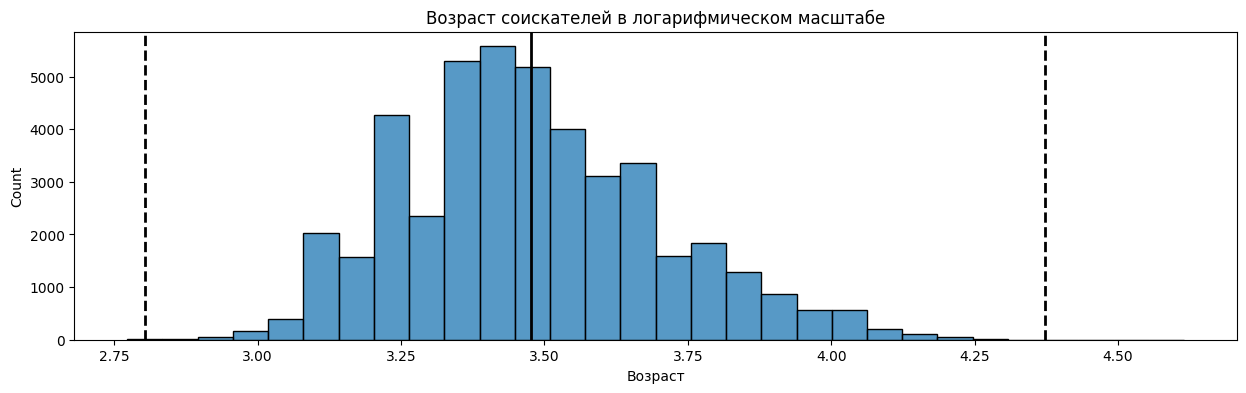

In [55]:

fig, axes = plt.subplots(1, 1, figsize=(15, 4))
#гистограмма в логарифмическом масштабе
log_age= np.log(hh_database['Возраст'] + 1)
histplot = sns.histplot(log_age , bins=30, )
histplot.axvline(log_age.mean(), color='k', lw=2)
histplot.axvline(log_age.mean()+ 4 * log_age.std(), color='k', ls='--', lw=2)
histplot.axvline(log_age.mean()- 3 * log_age.std(), color='k', ls='--', lw=2)
histplot.set_title('Возраст соискателей в логарифмическом масштабе')

# Вычисляем показатель асиметрии
print(f'As= {log_age.skew()}')

# функция Z- отклонения методом 3 сигм
def outliers_z_score_mod(data, feature, log_scale=False, left=3, right=3):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

# Поиск выбросов с помошью функции outliers_z_score_mod
outliers, cleaned = outliers_z_score_mod(hh_database, 'Возраст', log_scale=True, left=3, right=4)

print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')
print(f'Таблица выбросов: { outliers.head()}')

# Удаление строк свыбросами по индексам
hh_database = hh_database.drop(outliers.index, axis=0)




Из графика видно, что асиметрия правасторонняя так как As больше 0.  
Из таблицы видно, что люди возрастом 100 лет и 15 поподают в категорию выбросов  